# Wstępne przygotowanie danych

## Import bibliotek 

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data_engagement = pd.read_csv("input/user_engagement.csv", encoding="utf-8")
data_graph = pd.read_csv("input/user_graph.csv", encoding="utf-8")
data_info = pd.read_csv("input/user_info.csv", encoding="utf-8")
data_login_info = pd.read_csv("input/user_login_info.csv", encoding="utf-8")

del data_engagement['user_id']
del data_graph['user_id']
del data_info['user_id']
del data_login_info['user_id']

df = pd.concat([data_info, data_graph,data_engagement,data_login_info],axis=1)


In [3]:
df.head()

,has_profile_pic,has_valid_push_token,followers,followings,active_followers,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,num_favour_rcvd_30d,country_id,primary_device,days_active,activity
0,1,1,144.000,139.000,134.000,10,186,24,14109,806,19,7,111,27,h,B,26,t
1,1,1,90.000,435.000,78.000,16,5,5,2114,85,4,0,1,0,d,B,27,t
2,0,1,2.000,14.000,0.000,0,0,0,0,32,0,0,0,0,h,A,21,t
3,1,1,21.000,131.000,13.000,1,4,3,12654,595,1,0,6,0,h,A,29,t
4,0,0,1.000,59.000,0.000,1,1,1,0,1335,0,0,0,0,h,E,30,f


### Informacja o zmiennych

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 18 columns):
has_profile_pic                  int64
has_valid_push_token             int64
followers                        float64
followings                       float64
active_followers                 float64
num_mutual_follower_added_30d    int64
num_tweets_30d                   int64
num_tweet_days_30d               int64
time_in_app_30d                  int64
num_timeline_views_30d           int64
num_share_sent_days_30d          int64
num_share_rcvd_30d               int64
num_favour_sent_30d              int64
num_favour_rcvd_30d              int64
country_id                       object
primary_device                   object
days_active                      int64
activity                         object
dtypes: float64(3), int64(12), object(3)
memory usage: 549.3+ MB


In [5]:
df.describe()


,has_profile_pic,has_valid_push_token,followers,followings,active_followers,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,num_favour_rcvd_30d,days_active
count,4000000.000,4000000.000,3928007.000,3967588.000,3928007.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000
mean,0.915,0.902,424.013,273.838,279.464,9.154,87.519,10.146,13933.095,597.268,5.173,22.238,63.162,44.279,23.250
std,0.279,0.298,34250.333,1254.984,13424.065,102.175,364.716,10.310,22236.435,1321.794,7.842,2617.967,571.738,3568.737,8.723
min,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,1.000,1.000,18.000,52.000,13.000,0.000,1.000,1.000,602.000,46.000,0.000,0.000,0.000,0.000,18.000
50%,1.000,1.000,81.000,141.000,63.000,1.000,12.000,6.000,5398.000,201.000,1.000,0.000,4.000,1.000,28.000
75%,1.000,1.000,233.000,297.000,182.000,5.000,61.000,19.000,18384.250,663.000,7.000,2.000,31.000,13.000,30.000
max,1.000,1.000,51580785.000,937499.000,18812685.000,41780.000,109557.000,30.000,926794.000,1030351.000,30.000,3461165.000,338597.000,5014811.000,30.000


### Z charekterystyki zauważamy że :
1. Zmienne 'followers', 'followings', 'active_followers' zawierają puste rekordy
2. Maksymalna wartość zmiennej 'time_in_app_30d' = 926794 co równe 624 dni co znaczy że data set zawiera szum. 

In [6]:
df.describe(include=['object', 'bool'])

,country_id,primary_device,activity
count,4000000,4000000,4000000
unique,8,5,2
top,h,B,t
freq,1769606,2059036,3215629


### Zmienianie nazw kategorii zmiennych 

In [7]:
d = {'f' : False, 't' : True}
df['activity'] = df['activity'].map(d)
d_1 = {0 : False, 1 : True}
df['has_profile_pic'] = df['has_profile_pic'].map(d_1)
df['has_valid_push_token'] = df['has_valid_push_token'].map(d_1)
df.head()

,has_profile_pic,has_valid_push_token,followers,followings,active_followers,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,num_favour_rcvd_30d,country_id,primary_device,days_active,activity
0,True,True,144.000,139.000,134.000,10,186,24,14109,806,19,7,111,27,h,B,26,True
1,True,True,90.000,435.000,78.000,16,5,5,2114,85,4,0,1,0,d,B,27,True
2,False,True,2.000,14.000,0.000,0,0,0,0,32,0,0,0,0,h,A,21,True
3,True,True,21.000,131.000,13.000,1,4,3,12654,595,1,0,6,0,h,A,29,True
4,False,False,1.000,59.000,0.000,1,1,1,0,1335,0,0,0,0,h,E,30,False


# Optymalizacja kolumn numerycznych za pomocą konwersji w dół

### Funkcja liczenia używanej pamięci przez data set 

In [8]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2
    return "{:03.2f} MB".format(usage_mb)

In [9]:
gl_int = df.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(gl_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

0.00 MB
0.00 MB


,before,after


In [10]:
gl_float = df.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(gl_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

91.55 MB
45.78 MB


,before,after
float32,nan,3.000
float64,3.000,nan


In [11]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float

### informacje o liczbie pustych rekordów w poszczególnych zmiennych

In [12]:
optimized_df.isnull().sum()

has_profile_pic                      0
has_valid_push_token                 0
followers                        71993
followings                       32412
active_followers                 71993
num_mutual_follower_added_30d        0
num_tweets_30d                       0
num_tweet_days_30d                   0
time_in_app_30d                      0
num_timeline_views_30d               0
num_share_sent_days_30d              0
num_share_rcvd_30d                   0
num_favour_sent_30d                  0
num_favour_rcvd_30d                  0
country_id                           0
primary_device                       0
days_active                          0
activity                             0
dtype: int64

### Zastępowanie pustych rekordów wartośćią "0"

In [13]:
for i in ['followers', 'followings','active_followers']:
    if i in optimized_df.columns:
        optimized_df[i].fillna(0, inplace=True)

### Niewiem dla czego, ale skrypt 9 nie zadziałał dlatego wykonuję to ręcznie 

In [14]:
optimized_df.has_profile_pic = optimized_df.has_profile_pic.astype('bool')
optimized_df.has_valid_push_token = optimized_df.has_valid_push_token.astype('bool')
optimized_df.num_mutual_follower_added_30d = optimized_df.num_mutual_follower_added_30d.astype('uint16')
optimized_df.num_tweet_days_30d = optimized_df.num_tweet_days_30d.astype('uint8')
optimized_df.num_share_sent_days_30d = optimized_df.num_share_sent_days_30d.astype('uint8')
optimized_df.days_active = optimized_df.days_active.astype('uint8')
optimized_df.country_id = optimized_df.country_id.astype('object')

for i in ['followers', 'followings','active_followers', 'num_tweets_30d','time_in_app_30d',
          'num_timeline_views_30d','num_share_rcvd_30d','num_favour_sent_30d','num_favour_rcvd_30d']:
    if i in optimized_df.columns:
        optimized_df[i]=optimized_df[i].astype('uint32')

# Pamięć przep optymizacją i po     
print("Przed optymizacją = " + mem_usage(df))
print("Po optymizacji = " + mem_usage(optimized_df))

Przed optymizacją = 881.20 MB
Po optymizacji = 640.87 MB


In [15]:
optimized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 18 columns):
has_profile_pic                  bool
has_valid_push_token             bool
followers                        uint32
followings                       uint32
active_followers                 uint32
num_mutual_follower_added_30d    uint16
num_tweets_30d                   uint32
num_tweet_days_30d               uint8
time_in_app_30d                  uint32
num_timeline_views_30d           uint32
num_share_sent_days_30d          uint8
num_share_rcvd_30d               uint32
num_favour_sent_30d              uint32
num_favour_rcvd_30d              uint32
country_id                       object
primary_device                   object
days_active                      uint8
activity                         bool
dtypes: bool(3), object(2), uint16(1), uint32(9), uint8(3)
memory usage: 228.9+ MB


### Ustawienia wyświetlania wykresów  

In [16]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# wyłączenie ostrzeżenia Anaconda
import warnings
warnings.simplefilter('ignore')

# będziemy wyświetlać wykresy bezpośrednio w jupyter'e
%pylab inline

#zwiększyć domyślny rozmiar wykresu
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [17]:
optimized_df.head()

,has_profile_pic,has_valid_push_token,followers,followings,active_followers,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,num_favour_rcvd_30d,country_id,primary_device,days_active,activity
0,True,True,144,139,134,10,186,24,14109,806,19,7,111,27,h,B,26,True
1,True,True,90,435,78,16,5,5,2114,85,4,0,1,0,d,B,27,True
2,False,True,2,14,0,0,0,0,0,32,0,0,0,0,h,A,21,True
3,True,True,21,131,13,1,4,3,12654,595,1,0,6,0,h,A,29,True
4,False,False,1,59,0,1,1,1,0,1335,0,0,0,0,h,E,30,False


### Częstotliwosć występowania poszczególnych kategorii w zmiennych kategorycznych

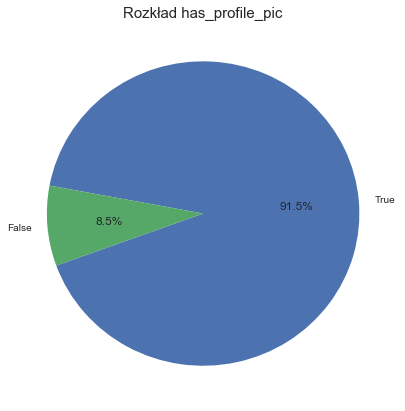

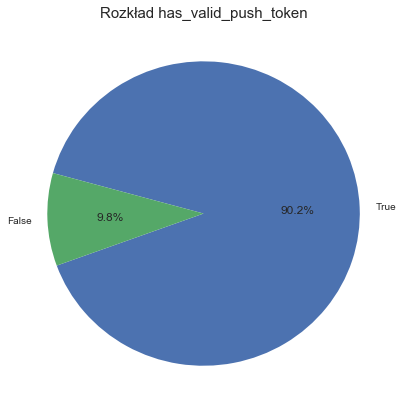

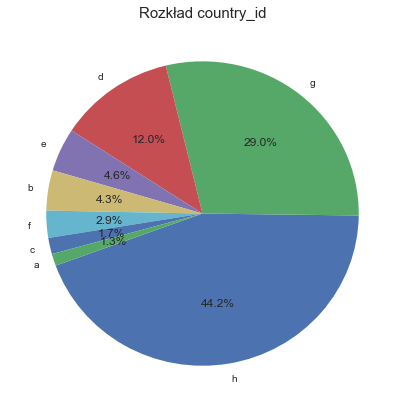

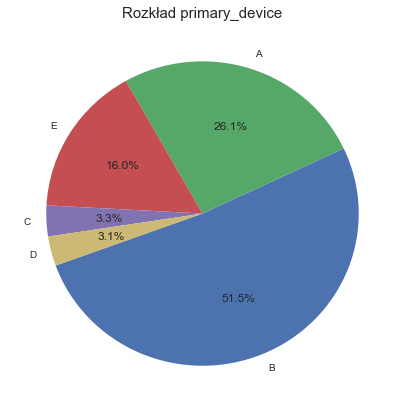

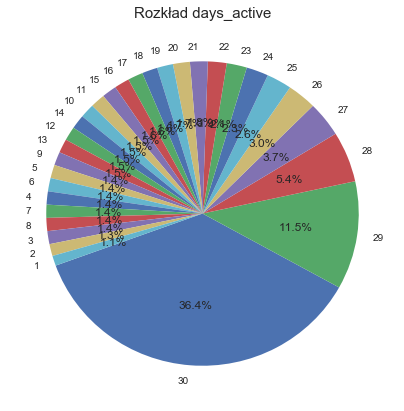

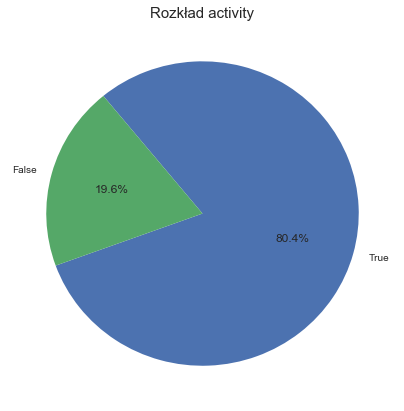

In [18]:
for i in ['has_profile_pic', 'has_valid_push_token','country_id', 'primary_device','days_active',
          'activity']:
    if i in optimized_df.columns:
        plt.figure(figsize=(7,7))
        temp_series = optimized_df[i].value_counts()
        labels = (np.array(temp_series.index))
        sizes = (np.array((temp_series / temp_series.sum())*100))
        plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
        plt.title("Rozkład " + i, fontsize=15)
        plt.show()

## Ta wizualizacja pomoże nam spojrzeć na jednym rysunku, na to, jak połączone są różne cechy.

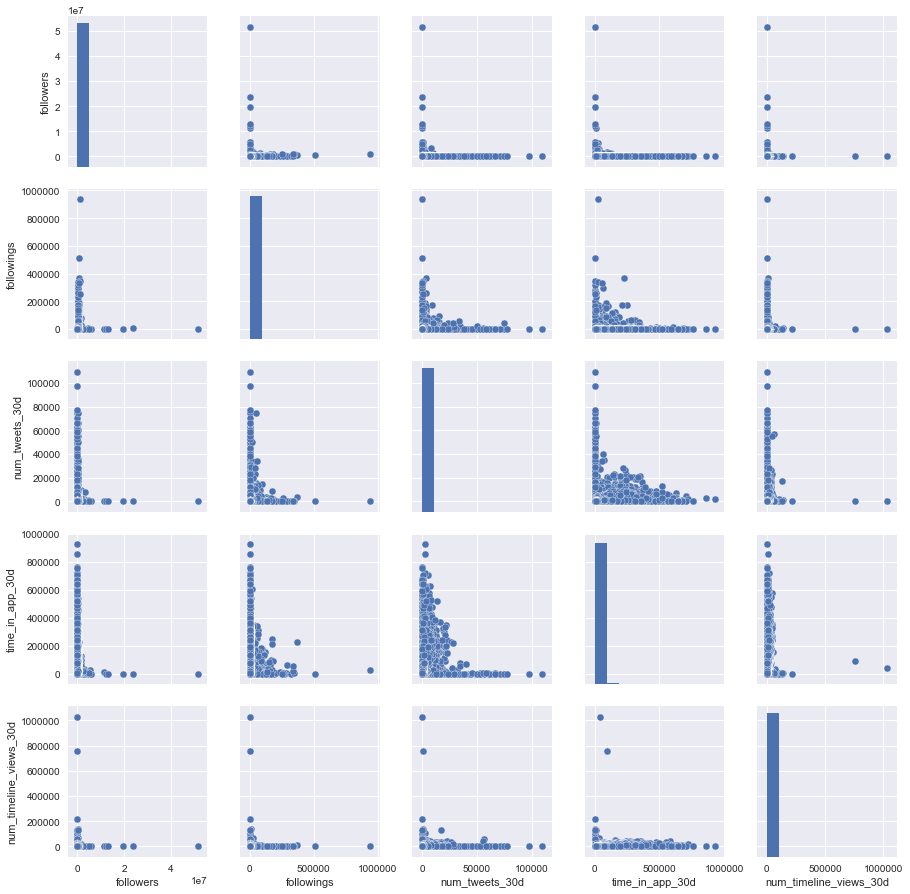

In [20]:
cols = ['followers', 'followings', 'num_tweets_30d', 'time_in_app_30d', 'num_timeline_views_30d']
sns_plot = sns.pairplot(optimized_df[cols])
sns_plot.savefig('pairplot.png')

Jak można zauważyć, histogramy rozkładu cech znajdują się na przekątnej macierzy wykresów

## Zależność pomiędzy primary_device oraz days_active , a zmienną activity

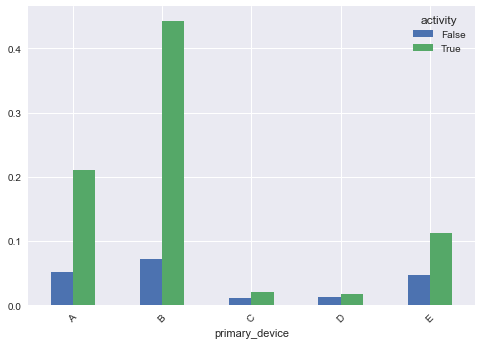

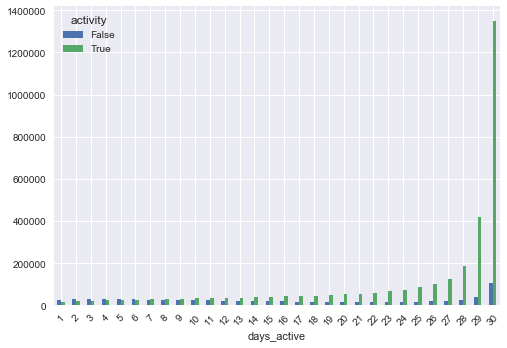

In [19]:
pd.crosstab(optimized_df['primary_device'], optimized_df['activity'], normalize=True).plot(kind='bar', rot=45)
pd.crosstab(optimized_df['days_active'], optimized_df['activity']).plot(kind='bar', rot=45)

## Macierz korelacji cech ilościowych 

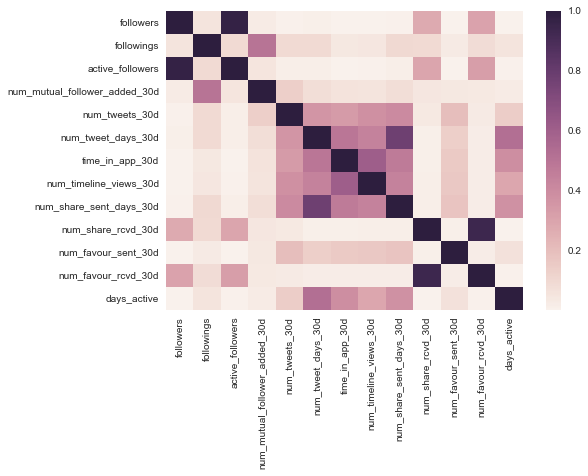

In [20]:
corr_matrix = df.drop(['has_profile_pic', 'has_valid_push_token', 'country_id',
                      'primary_device','activity'], axis=1).corr()
sns.heatmap(corr_matrix);


### Usuwanie cech które nie nioszą użytecznyej informacji
Spójrzmy na korelację cech ilościowych. Na kolorowej matrycy korelacji widać, że takie cechy, jak 'active_followers', są liczone zgodnie z 'followers', oraz to somo można zauważyć dla cechy 'num_favour_rcvd_30d' oraz 'num_share_rcvd_30d'. Oznacza to, że 2 cechy mogą zostać wyrzucone, nie nioszą użytecznych informacji.

In [21]:
del optimized_df['active_followers']
del optimized_df['num_favour_rcvd_30d']

## Rozkład wszystkich interesujących cech ilościowych

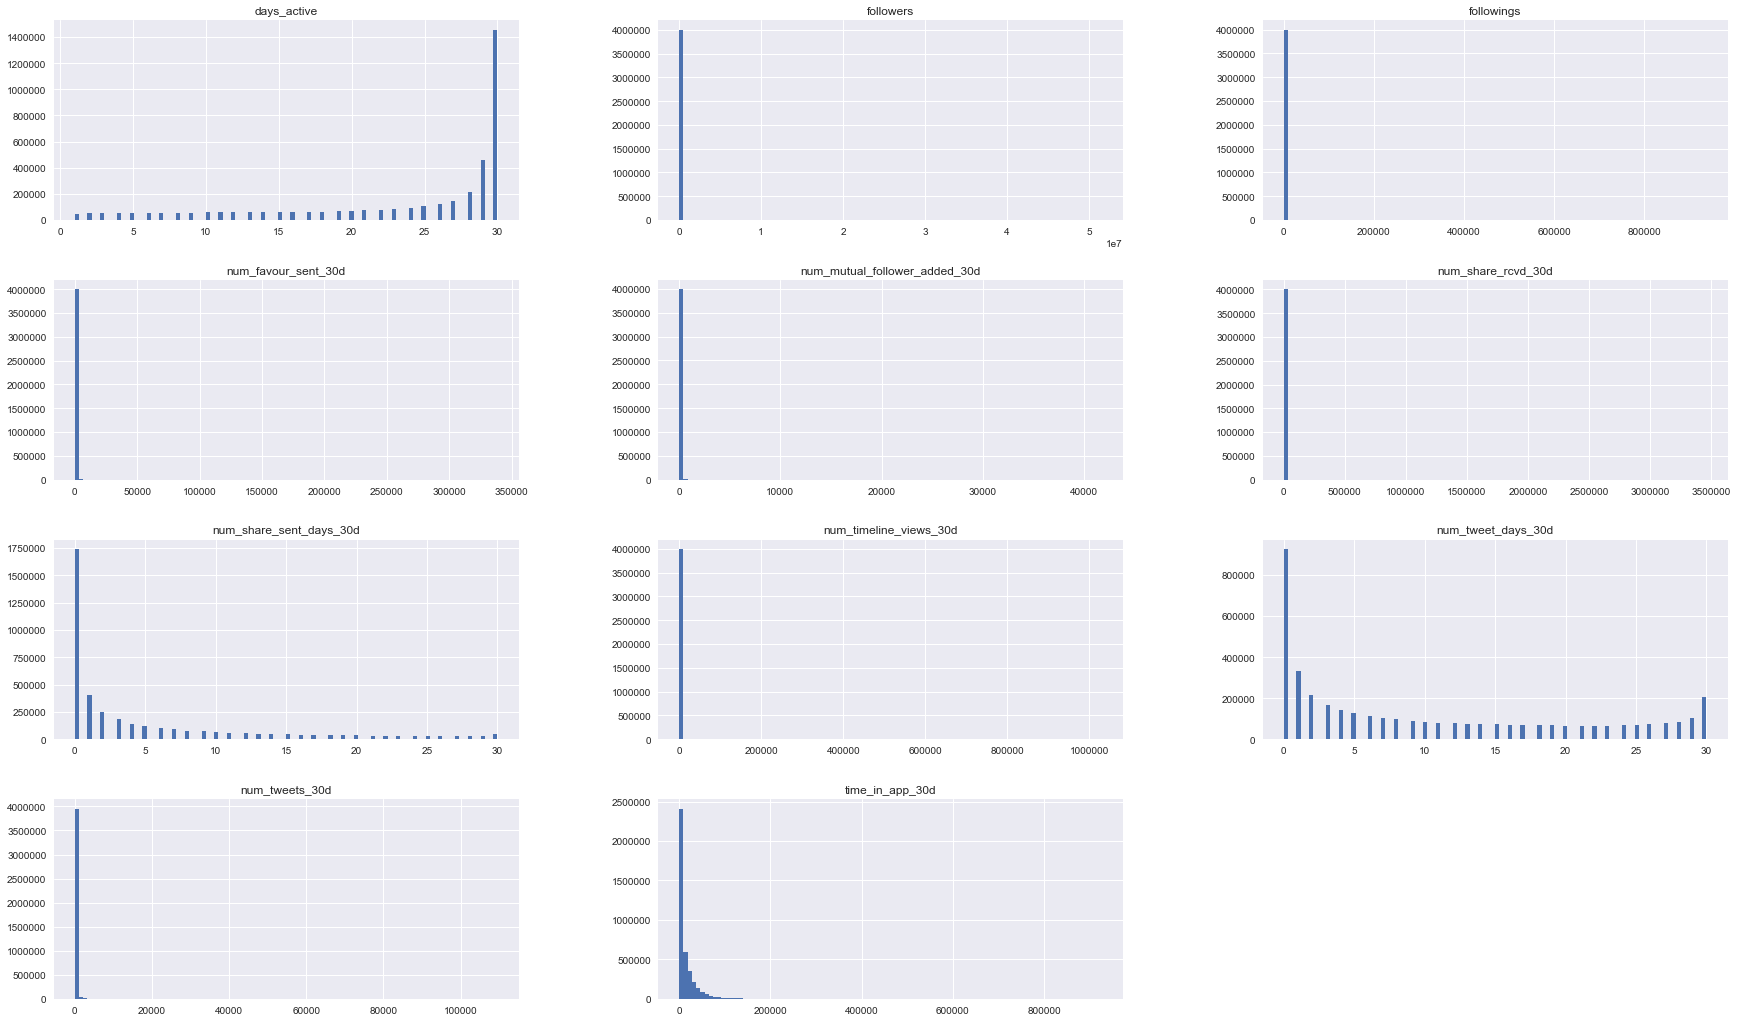

In [22]:
features = list(set(optimized_df.columns) - set(['has_profile_pic', 'has_valid_push_token', 'country_id',
                                                 'primary_device', 'activity']))                       
                                        

optimized_df[features].hist(figsize=(30,18), bins = 100);

Jak widać na wykresach wyżej żadne z cech nie mają rozkładu normalnego. 

## Generowanie nowych cech 

In [23]:
optimized_df['mean_days_tweet'] = optimized_df['num_tweets_30d']/optimized_df['days_active']
optimized_df['mean_followers_followings'] = optimized_df[['followers', 'followings']].mean(axis=1)

W celu polepszenia jakośći modelu predykcji, generujemy nowe cechy na podstawie istniejących. 

## Tworzenie zmiennej kategoryczny w wyniku koniunkcji dwóch zmiennych

In [24]:
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
    return (df)
make_conj(optimized_df, 'country_id', 'primary_device')

,has_profile_pic,has_valid_push_token,followers,followings,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,country_id,primary_device,days_active,activity,mean_days_tweet,mean_followers_followings,country_id + primary_device
0,True,True,144,139,10,186,24,14109,806,19,7,111,h,B,26,True,7.154,141.500,h + B
1,True,True,90,435,16,5,5,2114,85,4,0,1,d,B,27,True,0.185,262.500,d + B
2,False,True,2,14,0,0,0,0,32,0,0,0,h,A,21,True,0.000,8.000,h + A
3,True,True,21,131,1,4,3,12654,595,1,0,6,h,A,29,True,0.138,76.000,h + A
4,False,False,1,59,1,1,1,0,1335,0,0,0,h,E,30,False,0.033,30.000,h + E
5,True,True,21,117,2,51,14,10729,262,11,0,117,h,B,26,True,1.962,69.000,h + B
6,True,True,247,500,17,4713,29,14546,649,28,0,3,g,B,30,True,157.100,373.500,g + B
7,True,True,266,363,28,5,5,1993,518,5,0,30,g,B,30,True,0.167,314.500,g + B
8,True,True,964,728,6,185,26,3030,157,17,16,13,h,A,30,True,6.167,846.000,h + A
9,True,True,180,718,0,0,0,5683,274,0,0,0,h,A,22,True,0.000,449.000,h + A


## Korelacja pomiędzy zminnymi, a zmienną docelową "activity" 

In [25]:
for i in ['has_profile_pic', 'has_valid_push_token', 'followers', 'followings', 
          'active_followers', 'num_mutual_follower_added_30d', 'num_tweets_30d', 'num_tweet_days_30d',
         'time_in_app_30d', 'num_timeline_views_30d', 'num_share_sent_days_30d',
          'num_share_rcvd_30d', 'days_active','num_favour_sent_30d','num_favour_rcvd_30d', 'mean_days_tweet',
          'followers/followings', 'mean_followers_followings_Afollowers']:
    if i in optimized_df.columns:
        print(str(i) + ' = ' + str(optimized_df[i].corr(optimized_df.activity)))
        

has_profile_pic = 0.35271277097
has_valid_push_token = 0.22247164787
followers = 0.00526083739976
followings = 0.0557094976622
num_mutual_follower_added_30d = 0.0378645374765
num_tweets_30d = 0.115598759233
num_tweet_days_30d = 0.458587697566
time_in_app_30d = 0.241607973237
num_timeline_views_30d = 0.184462593307
num_share_sent_days_30d = 0.31449084323
num_share_rcvd_30d = 0.00417000184687
days_active = 0.400589383439
num_favour_sent_30d = 0.0532861611881
mean_days_tweet = 0.117011374838


## Zależność pomiędzy country_id + primary_device , a zmienną activity

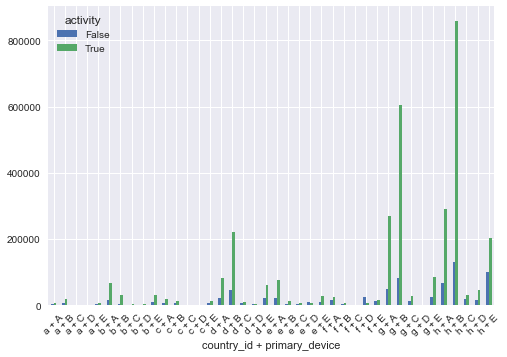

In [26]:
sorted(pd.crosstab(optimized_df['country_id + primary_device'], optimized_df['activity'])).plot(kind='bar', rot=45)

### Kategorii poniżej 20000 dla zmiennej country_id + primary_device zapisuję do oddzielniej kategorii OTHER

In [27]:
optimized_df['country_id + primary_device'].loc[optimized_df.groupby ('country_id + primary_device')['country_id + primary_device'].
                          transform ('count').fillna(optimized_df['country_id + primary_device'].
                          isnull().sum()) <= 20000] = 'OTHER'

## Zależność pomiędzy has_valid_push_token , a zmienną activity

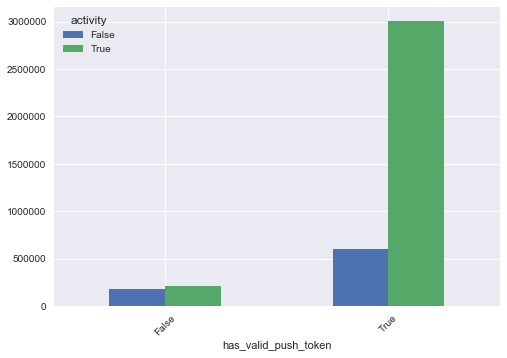

In [28]:
pd.crosstab(optimized_df['has_valid_push_token'], optimized_df['activity']).plot(kind='bar', rot=45)


### Z wykresu widać że przy wyłączonych wiadomościach na urządzeniu ilość nieaktywnych użytkowników jest prawie równe iloście aktywnych. 

In [29]:
d = {False : 0, True : 1}
optimized_df['activity'] = optimized_df['activity'].map(d)
optimized_df['has_profile_pic'] = optimized_df['has_profile_pic'].map(d)
optimized_df['has_valid_push_token'] = optimized_df['has_valid_push_token'].map(d)
optimized_df.head()

,has_profile_pic,has_valid_push_token,followers,followings,num_mutual_follower_added_30d,num_tweets_30d,num_tweet_days_30d,time_in_app_30d,num_timeline_views_30d,num_share_sent_days_30d,num_share_rcvd_30d,num_favour_sent_30d,country_id,primary_device,days_active,activity,mean_days_tweet,mean_followers_followings,country_id + primary_device
0,1,1,144,139,10,186,24,14109,806,19,7,111,h,B,26,1,7.154,141.500,h + B
1,1,1,90,435,16,5,5,2114,85,4,0,1,d,B,27,1,0.185,262.500,d + B
2,0,1,2,14,0,0,0,0,32,0,0,0,h,A,21,1,0.000,8.000,h + A
3,1,1,21,131,1,4,3,12654,595,1,0,6,h,A,29,1,0.138,76.000,h + A
4,0,0,1,59,1,1,1,0,1335,0,0,0,h,E,30,0,0.033,30.000,h + E


### Zapisywanie do nowego pliku 

In [30]:
optimized_df.to_csv('input/optimized_df.csv')

# Wnioski

### Предложения для группы роста: 
1. Прудложить включить Push уведомления 
2. Для пользователей которые пользуются устройствами "C", "D", "E" - делать предложения перейти на устройства "A", "B"
3. Собираете обратную связь по качеству работы предиктивных моделей. Например, через статистику, голосование, анкеты. Цель – убедиться, что ваш обученный AI нормально работает с реальными данными. 
4. Обновлять модели раз в квартал 
